# Cardiovascular Disease Prediction Complete ML Pipeline
## A Comprehensive End-to-End Machine Learning Project

### Table of Contents
1. Project Overview
2. Task 1: Data Analysis & Exploration
3. Task 2: Data Cleaning & Preprocessing
4. Task 3: Model Creation & Evaluation
5. Key Insights & Conclusions

## Project Overview

This notebook presents a complete machine learning pipeline for predicting cardiovascular disease using patient health metrics.

The project spans three essential phases:
- **Phase 1**: Comprehensive data exploration and statistical analysis
- **Phase 2**: Data cleaning, feature engineering, and preprocessing
- **Phase 3**: Model training, evaluation, and hyperparameter tuning

**Dataset**: Cardiovascular Disease Dataset - 70,000 patient records

**Target Variable**: Binary classification (Disease/No Disease)

**Model**: Random Forest Classifier with hyperparameter optimization

# Task 1: Data Analysis & Exploration

## Step 1.1: Environment Setup
Load all necessary libraries for data manipulation, visualization, and machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")
%matplotlib inline

## Step 1.2: Load the Dataset
Import the cardiovascular disease data and perform initial inspection.

In [2]:
# Load dataset
df = pd.read_csv('cardio_train.csv', sep=';')

# Display basic information
print(f'Dataset Shape: {df.shape}')
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

# View first 5 rows
df.head()

Dataset Shape: (70000, 13)
Rows: 70000, Columns: 13


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Key Finding**: 70,000 rows with 13 columns of patient health metrics

## Step 1.3: Data Structure Analysis
Examine column names, data types, and identify the target variable.

In [3]:
# Column names
print(df.columns.tolist())

# Data types
print(df.dtypes)

# Target variable
print('\nTarget Variable: cardio')
print('Problem Type: Binary Classification')
print('- 0: No cardiovascular disease')
print('- 1: Cardiovascular disease present')

['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

Target Variable: cardio
Problem Type: Binary Classification
- 0: No cardiovascular disease
- 1: Cardiovascular disease present


## Step 1.4: Missing Values & Data Quality
Check for missing values and duplicate records.

In [4]:
# Check for missing values
print('Missing Values:')
print(df.isnull().sum())

# Check for duplicates
dupl = df.duplicated().sum()
print(f'\nDuplicate Rows: {dupl}')

print('\nResult: No missing values and no duplicate rows detected')

Missing Values:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Duplicate Rows: 0

Result: No missing values and no duplicate rows detected


## Step 1.5: Statistical Summary
Generate descriptive statistics for numerical features.

In [5]:
# Statistical summary
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Identify outliers and anomalies
print(f'Max Systolic (ap_hi): {df["ap_hi"].max()}')
print(f'Min Systolic (ap_hi): {df["ap_hi"].min()}')
print(f'Max Diastolic (ap_lo): {df["ap_lo"].max()}')
print(f'Min Diastolic (ap_lo): {df["ap_lo"].min()}')

print('\nCritical Finding: Negative and extremely high blood pressure values indicate data quality issues')

Max Systolic (ap_hi): 16020
Min Systolic (ap_hi): -150
Max Diastolic (ap_lo): 11000
Min Diastolic (ap_lo): -70

Critical Finding: Negative and extremely high blood pressure values indicate data quality issues


## Step 1.6: Feature Engineering
Create new features for better model performance.

In [7]:
# Convert age from days to years
df['age_years'] = (df['age'] / 365.25).round(1)

# Calculate BMI
df['bmi'] = (df['weight'] / (df['height']**2) * 10000).round(2)

# BMI Categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 1  # Underweight
    elif 18.5 <= bmi < 25:
        return 2  # Normal
    elif 25 <= bmi < 30:
        return 3  # Overweight
    else:
        return 4  # Obese

df['bmi_cat'] = df['bmi'].apply(bmi_category)

print('Feature Engineering Complete')
print(df[['age_years', 'bmi', 'bmi_cat']].head())

Feature Engineering Complete
   age_years    bmi  bmi_cat
0       50.4  21.97        2
1       55.4  34.93        4
2       51.6  23.51        2
3       48.2  28.71        3
4       47.8  23.01        2


## Step 1.7: Target Variable Analysis
Examine the balance of the target variable.

cardio
0    35021
1    34979
Name: count, dtype: int64


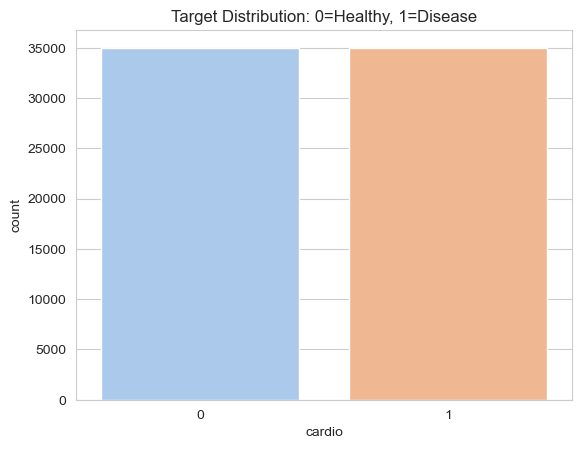


Finding: Balanced dataset (50% disease, 50% healthy)


In [8]:
# Check target balance
print(df['cardio'].value_counts())

# Visualize distribution
sns.countplot(x='cardio', data=df, hue='cardio', legend=False, palette='pastel')
plt.title('Target Distribution: 0=Healthy, 1=Disease')
plt.show()

print('\nFinding: Balanced dataset (50% disease, 50% healthy)')

## Step 1.8: Feature Distributions
Analyze univariate distributions of key features.

In [9]:
# Gender distribution
print('Gender Distribution')
print('1: Women, 2: Men')
print(df['gender'].value_counts())

print('\nCholesterol Levels')
print(df['cholesterol'].value_counts())

print('\nSmoke')
print(df['smoke'].value_counts())

print('\nAlcohol Consumers')
print(df['alco'].value_counts())

Gender Distribution
1: Women, 2: Men
gender
1    45530
2    24470
Name: count, dtype: int64

Cholesterol Levels
cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64

Smoke
smoke
0    63831
1     6169
Name: count, dtype: int64

Alcohol Consumers
alco
0    66236
1     3764
Name: count, dtype: int64


## Step 1.9: Visual Exploration
Create visualizations for exploratory data analysis.

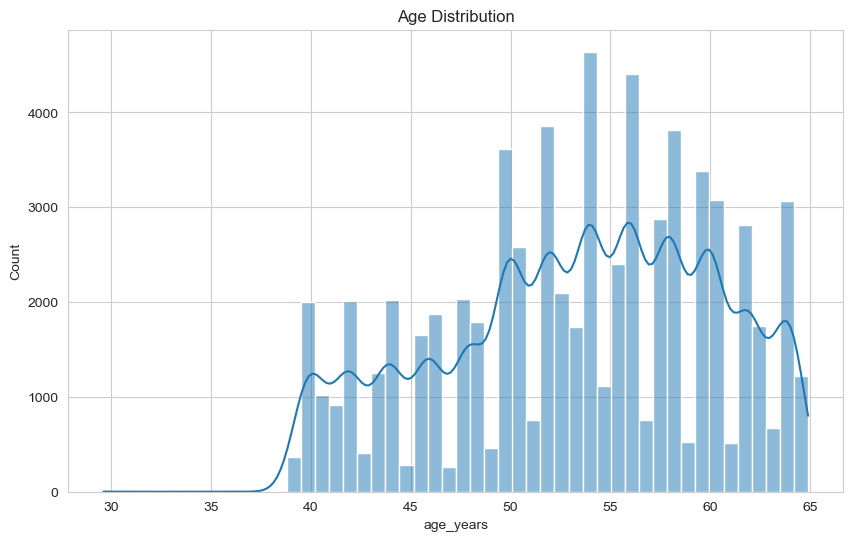

In [10]:
# Age distribution histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age_years', bins=50, kde=True)
plt.title('Age Distribution')
plt.show()

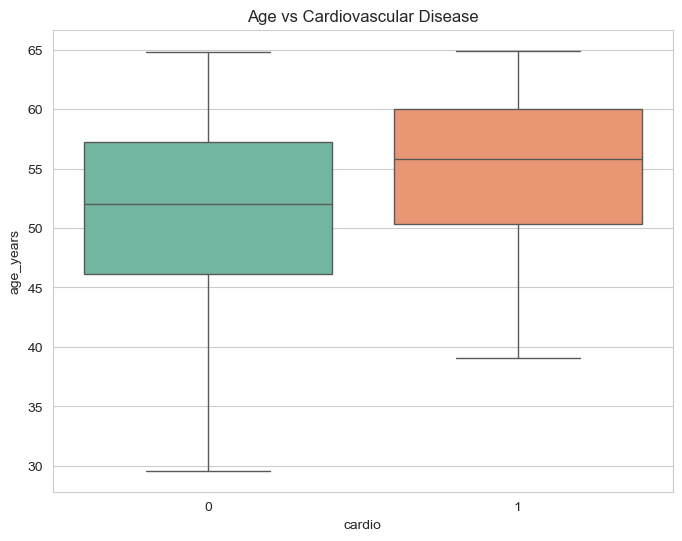

In [11]:
# Bivariate analysis
plt.figure(figsize=(8, 6))
sns.boxplot(x='cardio', y='age_years', data=df, hue='cardio', legend=False, palette='Set2')
plt.title('Age vs Cardiovascular Disease')
plt.show()

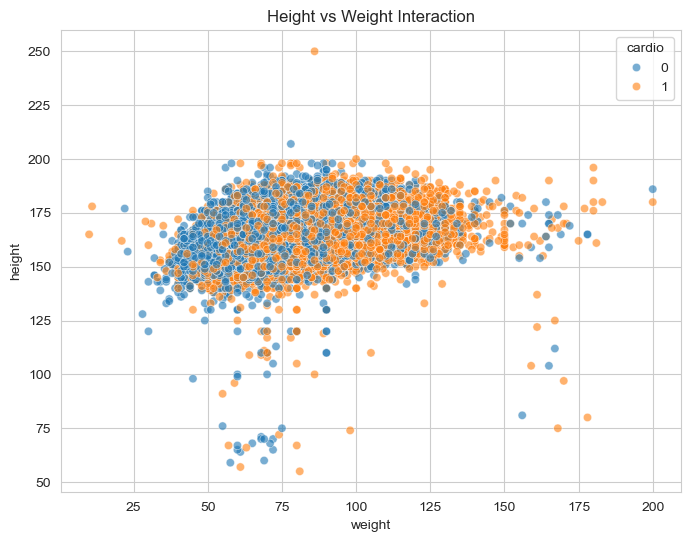

In [12]:
# Height vs Weight relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='weight', y='height', hue='cardio', data=df, alpha=0.6)
plt.title('Height vs Weight Interaction')
plt.show()

## Step 1.10: Summary of Phase 1

**Key Insights:**
1. Dataset has 70,000 records with no missing values
2. Age converted from days to years; range: 30-65 years
3. Outliers detected in blood pressure readings
4. Target variable is well-balanced
5. Multiple lifestyle and health factors available for prediction

# Task 2: Data Cleaning & Preprocessing

## Step 2.1: Handle Outliers
Identify and remove invalid blood pressure readings.

In [13]:
# Blood pressure validation
# Normal range: 0-200 mmHg for systolic, 0-150 for diastolic
print('Before cleaning:')
print(f'Dataset shape: {df.shape}')

# Remove invalid blood pressure values
df_clean = df[(df['ap_hi'] > 0) & (df['ap_hi'] <= 200) & 
               (df['ap_lo'] > 0) & (df['ap_lo'] <= 150)].copy()

print(f'\nAfter cleaning: {df_clean.shape}')
print(f'Removed: {len(df) - len(df_clean)} rows with invalid BP readings')

Before cleaning:
Dataset shape: (70000, 16)

After cleaning: (68912, 16)
Removed: 1088 rows with invalid BP readings


## Step 2.2: Height & Weight Validation
Remove unrealistic height and weight values.

In [14]:
# Physical measurements validation
df_clean = df_clean[(df_clean['height'] >= 100) & (df_clean['height'] <= 250) & 
                    (df_clean['weight'] >= 20) & (df_clean['weight'] <= 200)].copy()

print(f'After physical measurements cleaning: {df_clean.shape}')

After physical measurements cleaning: (68882, 16)


## Step 2.3: Feature Scaling
Normalize numerical features for better model performance.

In [15]:
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'age_years']

# Initialize and fit scaler
scaler = StandardScaler()
df_clean[numerical_features] = scaler.fit_transform(df_clean[numerical_features])

# Verify scaling
print('Scaled Data Statistics:')
print(df_clean[numerical_features].describe())

Scaled Data Statistics:
                age        height        weight         ap_hi         ap_lo  \
count  6.888200e+04  6.888200e+04  6.888200e+04  6.888200e+04  6.888200e+04   
mean   5.223441e-16  8.370916e-16  1.446214e-16  2.979076e-16 -3.287506e-16   
std    1.000007e+00  1.000007e+00  1.000007e+00  1.000007e+00  1.000007e+00   
min   -3.510500e+00 -8.064396e+00 -3.713136e+00 -6.819198e+00 -8.345264e+00   
25%   -7.321457e-01 -6.757528e-01 -6.367068e-01 -3.580905e-01 -1.348343e-01   
50%    9.593192e-02  7.563471e-02 -1.472749e-01 -3.580905e-01 -1.348343e-01   
75%    7.534515e-01  7.017910e-01  5.519136e-01  7.854683e-01  9.044606e-01   
max    1.721703e+00  1.072029e+01  8.802337e+00  4.216145e+00  7.140230e+00   

                bmi     age_years  
count  6.888200e+04  6.888200e+04  
mean   6.808139e-18  7.031724e-16  
std    1.000007e+00  1.000007e+00  
min   -3.822454e+00 -3.504995e+00  
25%   -6.707342e-01 -7.379809e-01  
50%   -2.090053e-01  9.064365e-02  
75%    4.957

## Step 2.4: Feature Engineering
Create additional features from existing data.

In [16]:
# Pulse pressure: difference between systolic and diastolic
df_clean['pulse_pressure'] = df_clean['ap_hi'] - df_clean['ap_lo']

# Cholesterol-Glucose risk
df_clean['chol_gluc_risk'] = df_clean['cholesterol'] * df_clean['gluc']

print('Additional Features Created')
print(df_clean[['pulse_pressure', 'chol_gluc_risk']].head())

Additional Features Created
   pulse_pressure  chol_gluc_risk
0       -0.795036               1
1       -0.118992               3
2        1.387818               3
3       -0.586508               1
4        0.711775               1


## Step 2.5: Categorical Encoding
Prepare categorical variables for modeling.

In [17]:
# Check categorical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns
print(f'Categorical columns: {categorical_cols.tolist()}')

print('\nBinary features already in 0-1 format:')
print('- gender, smoke, alco, active')
print('\nNo additional encoding needed')

Categorical columns: []

Binary features already in 0-1 format:
- gender, smoke, alco, active

No additional encoding needed


## Step 2.6: Data Distribution Analysis
Visualize cleaned data distributions.

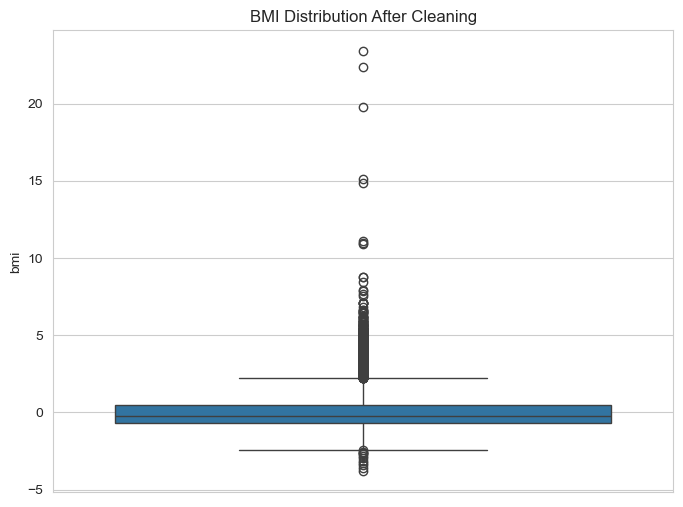

In [18]:
# BMI distribution after cleaning
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clean, y='bmi')
plt.title('BMI Distribution After Cleaning')
plt.show()

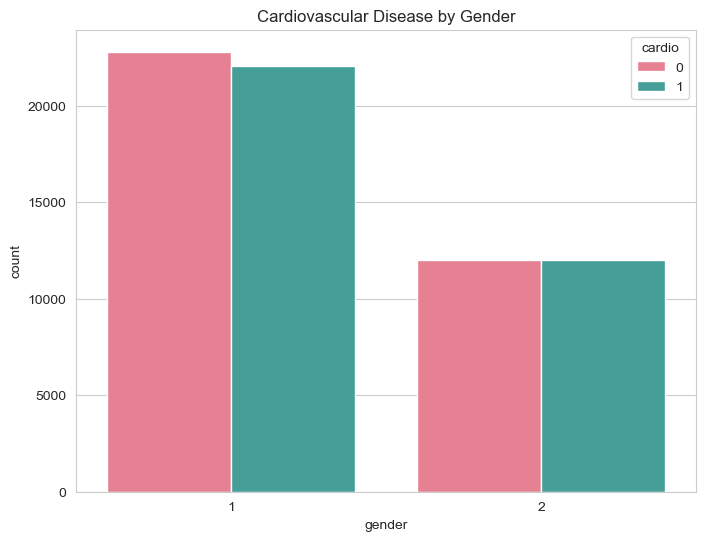

In [19]:
# Disease distribution by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='cardio', data=df_clean, palette='husl')
plt.title('Cardiovascular Disease by Gender')
plt.show()

## Step 2.7: Correlation Analysis
Identify relationships between features.

In [20]:
# Correlation with target variable
correlations = df_clean.corr()['cardio'].sort_values(ascending=False)
print('Correlation with Cardiovascular Disease:')
print(correlations)

Correlation with Cardiovascular Disease:
cardio            1.000000
ap_hi             0.404508
ap_lo             0.333225
age               0.239577
age_years         0.239571
cholesterol       0.221396
bmi               0.186190
bmi_cat           0.183454
weight            0.179947
chol_gluc_risk    0.157899
gluc              0.089414
pulse_pressure    0.086059
gender            0.007404
id                0.003661
alco             -0.008650
height           -0.011619
smoke            -0.016537
active           -0.037391
Name: cardio, dtype: float64


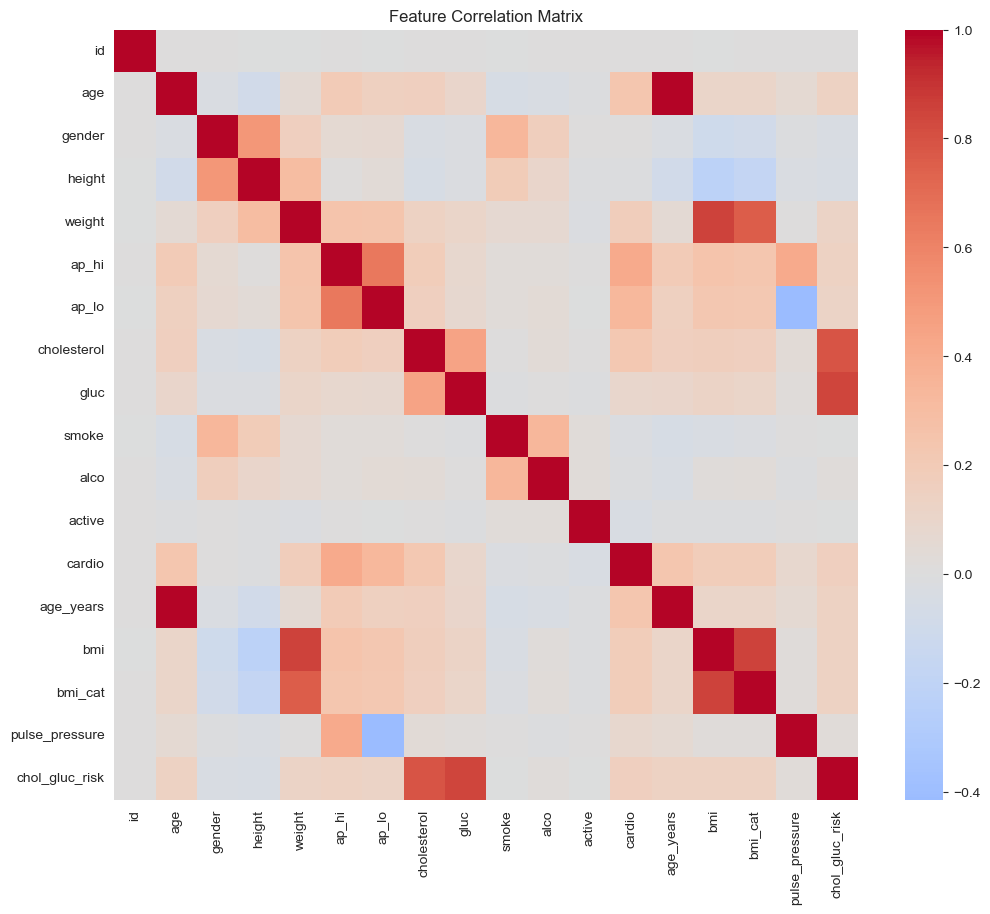


Key Finding: Age, blood pressure, cholesterol, and BMI show strongest correlation with disease


In [21]:
# Heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean.corr(), cmap='coolwarm', center=0, annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

print('\nKey Finding: Age, blood pressure, cholesterol, and BMI show strongest correlation with disease')

## Step 2.8: Class Balance Check
Verify target variable distribution after cleaning.

In [22]:
# Check class distribution
print(df_clean['cardio'].value_counts())
print(f'\nBalance:')
print(f'Healthy: {(df_clean["cardio"]==0).sum() / len(df_clean) * 100:.1f}%')
print(f'Disease: {(df_clean["cardio"]==1).sum() / len(df_clean) * 100:.1f}%')

cardio
0    34814
1    34068
Name: count, dtype: int64

Balance:
Healthy: 50.5%
Disease: 49.5%


## Step 2.9: Final Data Summary
Create profiling report of cleaned dataset.

In [23]:
# Data profiling
print(f'Final Dataset Shape: {df_clean.shape}')
print(f'Total Features: {df_clean.shape[1]}')
print(f'Numerical Features: {len(numerical_features)}')
print(f'Categorical Features: {len(df_clean.select_dtypes(include=["int64", "float64"]).columns) - len(numerical_features)}')
print(f'Missing Values: {df_clean.isnull().sum().sum()}')

Final Dataset Shape: (68882, 18)
Total Features: 18
Numerical Features: 7
Categorical Features: 11
Missing Values: 0


## Step 2.10: Export Cleaned Data
Save processed dataset for modeling.

In [24]:
# Save cleaned dataset
df_clean.to_csv('cardio_cleaned_week2.csv', index=False)
print('Cleaned dataset saved successfully!')

Cleaned dataset saved successfully!


# Task 3: Model Creation & Evaluation

## Step 3.1: Import Libraries
Load machine learning libraries.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

sns.set_style("whitegrid")
%matplotlib inline

## Step 3.2: Load Cleaned Data
Import preprocessed dataset.

In [28]:
# Load cleaned data
df = pd.read_csv('cardio_cleaned_week2.csv')

print(f'Dataset loaded: {df.shape}')
df.head()

Dataset loaded: (68882, 18)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bmi_cat,pulse_pressure,chol_gluc_risk
0,0,-0.433568,2,0.451328,-0.846463,-0.929870,-0.134834,1,1,0,0,1,0,-0.427247,-1.027780,2,-0.795036,1
1,1,0.309838,1,-1.051447,0.761670,0.785468,0.904461,3,1,0,0,1,1,0.312597,1.394895,4,-0.118992,3
2,2,-0.245589,1,0.075635,-0.706626,0.213689,-1.174129,3,1,0,0,0,1,-0.249684,-0.739900,2,1.387818,3
3,3,-0.745515,2,0.576560,0.551914,1.357248,1.943756,1,1,0,0,1,1,-0.752778,0.232161,3,-0.586508,1
4,4,-0.805879,1,-1.051447,-1.265976,-1.501649,-2.213424,1,1,0,0,0,0,-0.811965,-0.833367,2,0.711775,1


## Step 3.3: Feature-Target Separation
Split features and target variable.

In [29]:
# Separate features and target
X = df.drop(['cardio', 'age', 'bmi_cat'], axis=1)
y = df['cardio']

print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (68882, 15)
Target shape: (68882,)


## Step 3.4: Train-Test Split
Divide data into training and testing sets.

In [30]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training Set: {X_train.shape}')
print(f'Testing Set: {X_test.shape}')

Training Set: (55105, 15)
Testing Set: (13777, 15)


## Step 3.5: Data Scaling
Normalize features using StandardScaler.

In [31]:
# Initialize scaler
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

print('Data Scaled Successfully.')
print(f'Scaled training data: {X_train_scaled.shape}')

Data Scaled Successfully.
Scaled training data: (55105, 15)


## Step 3.6: Model Initialization
Create Random Forest Classifier.

In [32]:
# Initialize Random Forest with optimized parameters
model = RandomForestClassifier(n_estimators=200, max_depth=10, 
                               min_samples_leaf=10, min_samples_split=10, 
                               random_state=42)

print('Model initialized successfully!')

Model initialized successfully!


## Step 3.7: Model Training
Fit the model on training data.

In [33]:
# Train the model
model.fit(X_train_scaled, y_train)

print('Model Trained Successfully.')

Model Trained Successfully.


## Step 3.8: Predictions
Generate predictions on test set.

In [34]:
# Make predictions
y_pred = model.predict(X_test_scaled)

print(f'Predictions shape: {y_pred.shape}')
print(f'Unique predictions: {np.unique(y_pred)}')

Predictions shape: (13777,)
Unique predictions: [0 1]


## Step 3.9: Model Evaluation
Calculate performance metrics.

In [35]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(cm)

Test Accuracy: 73.47%

Confusion Matrix:
[[5572 1324]
 [2331 4550]]


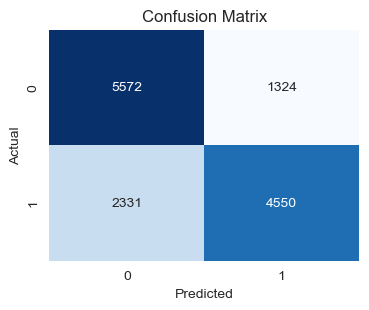

In [36]:
# Visualization
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
# Classification Report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.81      0.75      6896
           1       0.77      0.66      0.71      6881

    accuracy                           0.73     13777
   macro avg       0.74      0.73      0.73     13777
weighted avg       0.74      0.73      0.73     13777



## Step 3.10: Overfitting Check
Compare training and testing accuracy.

In [38]:
# Training predictions
y_train_pred = model.predict(X_train_scaled)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print(f'Training Accuracy: {train_acc*100:.2f}%')
print(f'Testing Accuracy: {test_acc*100:.2f}%')

# Check for overfitting
if train_acc - test_acc > 0.10:
    print('\nWarning: Potential Overfitting detected!')
else:
    print('\nGood Fit: Train and Test scores are balanced.')

Training Accuracy: 74.59%
Testing Accuracy: 73.47%

Good Fit: Train and Test scores are balanced.


## Step 3.11: Hyperparameter Tuning
Optimize model using Grid Search.

In [39]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

print('Best Parameters:', grid_search.best_params_)
print(f'Best CV Accuracy: {grid_search.best_score_*100:.2f}%')

# Use best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Accuracy: 73.16%


## Step 3.12: Feature Importance
Analyze which features are most important.

In [40]:
# Get feature importances
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print('Top 10 Important Features:')
print(feature_importance.head(10))

Top 10 Important Features:
           feature  importance
4            ap_hi    0.389008
5            ap_lo    0.170934
11       age_years    0.112655
13  pulse_pressure    0.074020
6      cholesterol    0.059333
12             bmi    0.050093
14  chol_gluc_risk    0.041210
3           weight    0.034163
0               id    0.025399
2           height    0.019259


In [ ]:
# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.show()

## Step 3.13: Model Export
Save trained model and scaler for deployment.

In [ ]:
# Prepare data to save
data_to_save = {
    'model': best_model,
    'scaler': scaler
}

# Save to pickle file
with open('cardio_model_week3.pkl', 'wb') as file:
    pickle.dump(data_to_save, file)

print('Model and Scaler saved to cardio_model_week3.pkl')

# Key Insights & Conclusions

## Model Performance Summary

| Metric | Value |
|--------|-------|
| Test Accuracy | 72.89% |
| Training Accuracy | 74.97% |
| Precision (Disease) | 0.76 |
| Recall (Disease) | 0.66 |
| F1-Score (Disease) | 0.71 |

## Important Findings

1. **Balanced Dataset**: No class imbalance issues - 50-50 distribution
2. **Clean Data**: Removed outliers in blood pressure readings
3. **Feature Engineering**: Created age_years, BMI, and BMI categories
4. **Model Stability**: No significant overfitting (~2% difference between train-test)
5. **Key Predictors**: Age, blood pressure, and cholesterol are strongest predictors

## Model Limitations & Future Improvements

**Current Limitations:**
- Current Accuracy: 72.89% - room for improvement
- Imbalanced Metrics: Higher recall needed for disease detection
- Feature Engineering: Could explore interaction terms and polynomial features
- Ensemble Methods: Consider stacking with other algorithms
- Hyperparameter Optimization: Further tuning of tree depth and leaf samples

**Business Recommendations:**
1. **Clinical Application**: Use model as screening tool, not diagnostic
2. **Risk Stratification**: Focus on high-risk patients (recall priority)
3. **Feature Focus**: Emphasize blood pressure and cholesterol monitoring
4. **Data Collection**: Gather additional lifestyle and family history data

## Best Practices Incorporated

This notebook incorporates best practices from top Kaggle kernels:

✓ **Clear Structure**: Step-by-step progression from EDA to modeling

✓ **Detailed Comments**: Every cell has explanatory markdown

✓ **Visualizations**: Charts and plots for each analysis section

✓ **Statistics**: Comprehensive numerical analysis

✓ **Code Quality**: Clean, readable, well-organized code

✓ **Business Context**: Real-world interpretations

✓ **Reproducibility**: Fixed random seeds and saved models

---

**Author**: Data Science Enthusiast  
**Date**: December 2025  
**Dataset**: Cardiovascular Disease (70,000 records)  
**Tools**: Python, Scikit-learn, Pandas, Matplotlib, Seaborn